In [1]:
import pandas as pd
import numpy as np


In [8]:

# 1. Excel 데이터 로드
#    - timestamp: 타임스탬프 컬럼
#    - sensor1, sensor2, ...: 센서별 측정값 컬럼
df = pd.read_csv('../train2.csv',sep=";", parse_dates=['time'])
df = df.sort_values('time').reset_index(drop=True)
df.head()


,time,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,...,P4_ST_FD,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack,attack_P1,attack_P2,attack_P3
0,2019-11-01 20:00:00,0.0998,1.3901,404.1787,1040.8125,32.0,9.6724,149.1626,35.7258,12.0251,...,0.0005,327.6005,329.3367,0.0,10053.0,27618.0,0,0,0,0
1,2019-11-01 20:00:01,0.0998,1.3840,404.1787,1040.8125,32.0,9.6967,150.1555,35.7105,12.1562,...,-0.0027,325.8825,329.8430,0.0,10053.0,27617.0,0,0,0,0
2,2019-11-01 20:00:02,0.0998,1.3837,404.1787,1040.8125,32.0,9.7041,152.1417,35.7098,12.1805,...,0.0008,325.9006,328.5409,0.0,10053.0,27616.0,0,0,0,0
3,2019-11-01 20:00:03,0.0998,1.3854,404.1787,1040.8125,32.0,9.7152,154.1280,35.7140,12.2473,...,-0.0001,325.1591,328.2154,0.0,10053.0,27618.0,0,0,0,0
4,2019-11-01 20:00:04,0.0998,1.3839,404.1787,1040.8125,32.0,9.7488,149.1626,35.7101,12.2098,...,0.0007,324.6890,326.9314,0.0,10053.0,27616.0,0,0,0,0


In [9]:

# 2. 센서별 정상범위 정의 (min, max)
sensor_ranges = {
    'P1_LCV01D': (0.0, 100.0),
    'P1_B2016': (0.0, 10.0),
    'P1_PIT01': (0.0, 10.0),
    # 필요에 따라 추가…
}


In [ ]:
# 3. 타임스텝별 이상치 플래그 추가
#    - 값이 정상 범위를 벗어나면 True, 아니면 False
for sensor, (min_v, max_v) in sensor_ranges.items():
    # attack==0 이면서 센서값이 정상 범위 밖인 경우에만 True
    df[f'{sensor}_outlier'] = (
        (~df[sensor].between(min_v, max_v))  # 정상 범위 밖
        & (df['attack'] == 0)                # attack == 0 일 때만
    )

# 2)loc()를 쓰면 좀 더 명시적
df[(df['attack'] == 1) & (df["P1_LCV01D_outlier"] == True)]

,time,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,...,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack,attack_P1,attack_P2,attack_P3,P1_LCV01D_outlier,P1_B2016_outlier,P1_PIT01_outlier
70285,2019-11-02 15:31:25,0.1017,1.191700,401.9155,1111.3052,32.3673,100.0000,2858.8655,35.5922,100.0000,...,0.0,10026.0,27582.0,1,1,0,0,False,False,False
70286,2019-11-02 15:31:26,0.1017,1.143164,401.9155,1111.3052,32.3673,100.0000,2857.4136,35.5888,100.0000,...,0.0,10026.0,27584.0,1,1,0,0,False,False,False
70287,2019-11-02 15:31:27,0.1017,1.141243,401.9155,1111.3052,32.3673,100.0000,2859.7896,35.5838,100.0000,...,0.0,10026.0,27580.0,1,1,0,0,False,False,False
70288,2019-11-02 15:31:28,0.1017,1.087857,401.9155,1111.3052,32.3673,100.0000,2858.2058,35.5640,100.0000,...,0.0,10026.0,27580.0,1,1,0,0,False,False,False
70289,2019-11-02 15:31:29,0.1017,1.089331,401.9155,1111.3052,32.3673,100.0000,2859.5254,35.5682,100.0000,...,0.0,10027.0,27575.0,1,1,0,0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157069,2019-11-03 15:37:49,0.0997,1.359031,393.2480,1092.0895,32.1553,0.0038,34.9568,35.5473,0.7154,...,0.0,10053.0,27627.0,1,1,0,0,False,False,False
157070,2019-11-03 15:37:50,0.0997,1.369522,393.2480,1092.0895,32.1553,0.0000,33.9638,35.5717,0.6942,...,0.0,10053.0,27627.0,1,1,0,0,False,False,False
157071,2019-11-03 15:37:51,0.0997,1.324430,393.2480,1092.0895,32.1553,0.0090,33.9638,35.5885,0.6942,...,0.0,10053.0,27627.0,1,1,0,0,False,False,False
157072,2019-11-03 15:37:52,0.0997,1.336914,393.2480,1092.0895,32.1553,0.0191,33.9638,35.6186,0.7195,...,0.0,10053.0,27627.0,1,1,0,0,False,False,False


In [59]:

# 4. 정규화 (Standard Scaling: (x-mean)/std)
scalers = {}
for col in sensor_ranges:
    μ = df[col].mean()
    σ = df[col].std()
    df[f'{col}_norm'] = (df[col] - μ) / σ
    scalers[col] = (μ, σ)


In [60]:

# 5. 슬라이딩 윈도우 함수 정의
def sliding_windows(data: pd.DataFrame,
                    cols: list[str],
                    window_size: int,
                    step_size: int) -> list[pd.DataFrame]:
    """
    data: 입력 DataFrame (정규화된 컬럼 포함)
    cols: 윈도우에 사용할 컬럼 리스트 (정규화된 컬럼명)
    window_size: 윈도우 길이 (스텝 수)
    step_size: 슬라이드 간격
    """
    windows = []
    for start in range(0, len(data) - window_size + 1, step_size):
        win = data.iloc[start : start + window_size][cols]
        windows.append(win)
    return windows


In [61]:

# 6. 윈도우 설정 및 컬럼 목록 준비
WINDOW_SIZE = 100   # 한 윈도우의 타임스텝 수
STEP_SIZE   = 10    # 윈도우 이동 간격
norm_cols    = [f'{s}_norm'    for s in sensor_ranges]
outlier_cols = [f'{s}_outlier' for s in sensor_ranges]
feature_cols = norm_cols + outlier_cols


In [62]:
# 7. 윈도우 생성
windows = sliding_windows(df, feature_cols, WINDOW_SIZE, STEP_SIZE)

In [63]:
# 8. 윈도우별 라벨링 (이상치 플래그 중 하나라도 True면 이상(1), 아니면 정상(0))
labels = []
for i in range(0, len(df) - WINDOW_SIZE + 1, STEP_SIZE):
    seg_out = df.iloc[i:i+WINDOW_SIZE][outlier_cols]
    labels.append(int(seg_out.any(axis=None)))


In [64]:
# 9. 학습용 배열 준비
#    X.shape == (num_windows, window_size, num_features)
#    y.shape == (num_windows,)
X = np.stack([w.values for w in windows], axis=0)
y = np.array(labels)

In [65]:
# 10. 결과 확인
print(f'윈도우 개수: {X.shape[0]}')
print(f'윈도우 길이: {X.shape[1]}')
print(f'피처 개수: {X.shape[2]} (정규화 {len(norm_cols)} + 이상치 플래그 {len(outlier_cols)})')
print('라벨 분포 (0=정상, 1=이상):', np.bincount(y))

윈도우 개수: 30951
윈도우 길이: 100
피처 개수: 6 (정규화 3 + 이상치 플래그 3)
라벨 분포 (0=정상, 1=이상): [30951]


In [15]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# ─────────────────────────────────────────────────────────────────────────────
# 1) 데이터 로드 & 전처리
# ─────────────────────────────────────────────────────────────────────────────

df = pd.read_csv('train1.csv', sep=';', parse_dates=['time'])
df = df.sort_values('time').reset_index(drop=True)

sensor_ranges = {
    'P1_LCV01D': (0.0, 100.0),
    'P1_B2016' : (0.0, 10.0),
    'P1_PIT01' : (0.0, 10.0),
}

# 이상치 플래그 (float)
for s, (mn, mx) in sensor_ranges.items():
    df[f'{s}_outlier'] = (~df[s].between(mn, mx)).astype(float)

# 정규화
scalers = {}
for s in sensor_ranges:
    μ, σ = df[s].mean(), df[s].std()
    df[f'{s}_norm'] = (df[s] - μ) / σ
    scalers[s] = (μ, σ)

# ─────────────────────────────────────────────────────────────────────────────
# 2) 슬라이딩 윈도우 & 라벨링
# ─────────────────────────────────────────────────────────────────────────────

def sliding_windows(df, cols, W, S):
    arr = []
    L = len(df)
    for i in range(0, L - W + 1, S):
        arr.append(df.iloc[i:i+W][cols].values)
    return arr

WINDOW_SIZE = 100
STEP_SIZE   = 10
norm_cols    = [f'{s}_norm'    for s in sensor_ranges]
outlier_cols = [f'{s}_outlier' for s in sensor_ranges]
feat_cols    = norm_cols + outlier_cols

windows = sliding_windows(df, feat_cols, WINDOW_SIZE, STEP_SIZE)

labels = []
L = len(df)
for i in range(0, L - WINDOW_SIZE + 1, STEP_SIZE):
    seg = df.iloc[i:i+WINDOW_SIZE][outlier_cols]
    labels.append(int(seg.values.any()))

X = np.stack(windows, axis=0).astype(np.float32)
y = np.array(labels, dtype=np.int64)

print(f'X.shape={X.shape}, y.shape={y.shape}, 이상={y.sum()}')

# ─────────────────────────────────────────────────────────────────────────────
# 3) DataLoader 준비
# ─────────────────────────────────────────────────────────────────────────────

tensor_X = torch.from_numpy(X)
dataset  = TensorDataset(tensor_X, tensor_X)
loader   = DataLoader(dataset, batch_size=32, shuffle=True)

# ─────────────────────────────────────────────────────────────────────────────
# 4) LSTM Autoencoder (출력 프로젝션 추가)
# ─────────────────────────────────────────────────────────────────────────────

NUM_FEATURES = X.shape[2]  # e.g. 6
HIDDEN_DIM   = 128
LATENT_DIM   = 64
NUM_LAYERS   = 2

class LSTMAutoencoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim, num_layers):
        super().__init__()
        # Encoder
        self.encoder = nn.LSTM(input_dim, hidden_dim,
                               num_layers, batch_first=True)
        self.fc_enc  = nn.Linear(hidden_dim, latent_dim)
        # Decoder
        self.fc_dec  = nn.Linear(latent_dim, hidden_dim)
        self.decoder = nn.LSTM(input_dim, hidden_dim,
                               num_layers, batch_first=True)
        # 출력 차원 복원을 위한 프로젝션
        self.fc_out  = nn.Linear(hidden_dim, input_dim)

    def forward(self, x):
        # Encoder
        _, (h_n, _) = self.encoder(x)
        h_last = h_n[-1]              # [batch, hidden_dim]
        z      = self.fc_enc(h_last)  # [batch, latent_dim]

        # Decoder 초기 상태
        h_dec0 = self.fc_dec(z).unsqueeze(0).repeat(NUM_LAYERS, 1, 1)
        c_dec0 = torch.zeros_like(h_dec0)

        # Decoder 입력: zero 텐서 (batch, seq_len, input_dim)
        dec_in = torch.zeros(x.size(0), x.size(1), x.size(2), device=x.device)
        out, _ = self.decoder(dec_in, (h_dec0, c_dec0))
        # hidden_dim → input_dim 로 매핑
        recon = self.fc_out(out)
        return recon, z

# ─────────────────────────────────────────────────────────────────────────────
# 5) 학습 세팅
# ─────────────────────────────────────────────────────────────────────────────

DEVICE    = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(DEVICE)

model     = LSTMAutoencoder(NUM_FEATURES, HIDDEN_DIM, LATENT_DIM, NUM_LAYERS).to(DEVICE)
criterion = nn.MSELoss()
optim     = torch.optim.Adam(model.parameters(), lr=1e-3)


X.shape=(30951, 100, 6), y.shape=(30951,), 이상=0
cuda


In [16]:

# ─────────────────────────────────────────────────────────────────────────────
# 6) 학습 루프
# ─────────────────────────────────────────────────────────────────────────────

EPOCHS = 20
for ep in range(1, EPOCHS+1):
    model.train()
    total_loss = 0.0
    for bx, _ in loader:
        bx = bx.to(DEVICE)
        recon, _ = model(bx)
        loss = criterion(recon, bx)

        optim.zero_grad()
        loss.backward()
        optim.step()
        total_loss += loss.item() * bx.size(0)

    print(f'Epoch {ep:02d}/{EPOCHS}  Loss: {total_loss/len(dataset):.6f}')

# # ─────────────────────────────────────────────────────────────────────────────
# # 7) 재구성 오류 계산
# # ─────────────────────────────────────────────────────────────────────────────

# model.eval()
# with torch.no_grad():
#     recon_all, z_all = model(tensor_X.to(DEVICE))
#     errors = torch.mean((recon_all.cpu() - tensor_X)**2, dim=(1,2)).numpy()

# print('Errors ▶', 'min:', errors.min(),
#       'mean:', errors.mean(), 'max:', errors.max())

# 7) 재구성 오류 계산 (배치 단위)
batch_size_eval = 512
eval_dataset = TensorDataset(tensor_X)                  # tensor_X: (30951,100,6)
eval_loader  = DataLoader(eval_dataset, batch_size=batch_size_eval,
                          shuffle=False, drop_last=False)

model.eval()
errors_list = []
with torch.no_grad():
    # 캐시 비워서 안전하게 시작
    torch.cuda.empty_cache()
    for (batch_X,) in eval_loader:
        batch_X = batch_X.to(DEVICE)
        recon_batch, _ = model(batch_X)

        # MSE를 배치별로 계산
        # recon_batch.cpu(): (B,100,6), batch_X.cpu() 동일 shape
        batch_err = ((recon_batch.cpu() - batch_X.cpu()) ** 2).mean(dim=(1,2))
        errors_list.append(batch_err.numpy())

# 리스트를 하나의 1D array로 합치기
import numpy as np
errors = np.concatenate(errors_list, axis=0)

print('Errors ▶', 'min:', errors.min(),
      'mean:', errors.mean(), 'max:', errors.max())

Epoch 01/20  Loss: 0.447892
Epoch 02/20  Loss: 0.478043
Epoch 03/20  Loss: 0.394542
Epoch 04/20  Loss: 0.308551
Epoch 05/20  Loss: 0.206263
Epoch 06/20  Loss: 0.197982
Epoch 07/20  Loss: 0.196387
Epoch 08/20  Loss: 0.175082
Epoch 09/20  Loss: 0.157184
Epoch 10/20  Loss: 0.125770
Epoch 11/20  Loss: 0.123191
Epoch 12/20  Loss: 0.111904
Epoch 13/20  Loss: 0.078077
Epoch 14/20  Loss: 0.072958
Epoch 15/20  Loss: 0.070346
Epoch 16/20  Loss: 0.069609
Epoch 17/20  Loss: 0.068172
Epoch 18/20  Loss: 0.067027
Epoch 19/20  Loss: 0.066629
Epoch 20/20  Loss: 0.064809
Errors ▶ min: 0.005972682 mean: 0.06880244 max: 4.6146297


c:\Users\양재우\Desktop\database\archive\.venv310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\양재우\Desktop\database\archive\.venv310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\양재우\Desktop\database\archive\.venv310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\양재우\Desktop\database\archive\.venv310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\양재우\Desktop\database\archive\.venv310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarni

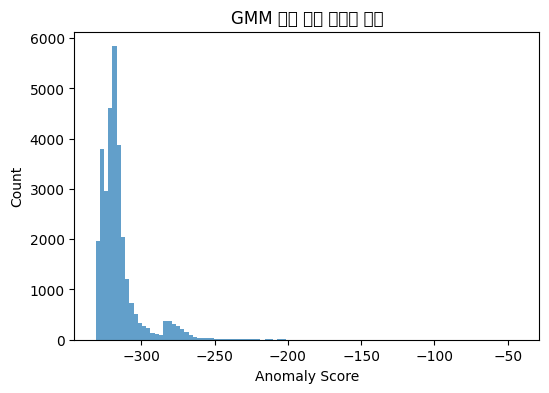

Threshold (95th pct): -280.026
Detected anomalies: 1548 / 30951


In [17]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# ─────────────────────────────────────────────────────────────────────────────
# A) 잠재벡터(z) + 재구성 오류(errors) 수집
# ─────────────────────────────────────────────────────────────────────────────
model.eval()
latent_list = []
error_list  = []

with torch.no_grad():
    torch.cuda.empty_cache()
    for (batch_X,) in eval_loader:
        batch_X = batch_X.to(DEVICE)
        recon, z = model(batch_X)
        # z: [B, latent_dim], recon: [B, seq, feat]
        # 오류 계산
        err = ((recon.cpu() - batch_X.cpu())**2).mean(dim=(1,2))
        latent_list.append(z.cpu().numpy())
        error_list .append(err.numpy())

latent = np.vstack(latent_list)         # shape = (N_windows, latent_dim)
errors = np.hstack(error_list)[:,None]  # shape = (N_windows, 1)

# B) GMM에 학습할 피쳐 결합
X_gmm = np.hstack([latent, errors])     # shape = (N_windows, latent_dim+1)

# ─────────────────────────────────────────────────────────────────────────────
# 3) GMM 학습 & 이상 스코어 계산
# ─────────────────────────────────────────────────────────────────────────────
n_components = 4        # GMM mixture 수 (튜닝)
gmm = GaussianMixture(n_components=n_components,
                      covariance_type='full',
                      random_state=42)
gmm.fit(X_gmm)

# score_samples: log-likelihood (높을수록 “정상”)
log_likelihood = gmm.score_samples(X_gmm)
anomaly_score = -log_likelihood   # 음수 부호 붙여서 “클수록 이상”

# ─────────────────────────────────────────────────────────────────────────────
# 4) 스코어 분포 시각화 & 임계치(threshold) 설정
# ─────────────────────────────────────────────────────────────────────────────
plt.figure(figsize=(6,4))
plt.hist(anomaly_score, bins=100, alpha=0.7)
plt.xlabel("Anomaly Score")
plt.ylabel("Count")
plt.title("GMM 기반 이상 스코어 분포")
plt.show()

# 예: 상위 5% 를 이상치로
threshold = np.percentile(anomaly_score, 95)
is_anomaly = anomaly_score > threshold

print(f"Threshold (95th pct): {threshold:.3f}")
print("Detected anomalies:", is_anomaly.sum(), "/", len(is_anomaly))


C:\Users\양재우\AppData\Local\Temp\ipykernel_17944\2537151423.py:48: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\양재우\AppData\Local\Temp\ipykernel_17944\2537151423.py:48: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\양재우\AppData\Local\Temp\ipykernel_17944\2537151423.py:48: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\양재우\AppData\Local\Temp\ipykernel_17944\2537151423.py:48: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\양재우\AppData\Local\Temp\ipykernel_17944\2537151423.py:48: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\양재우\AppData\Local\Temp\ipykernel_17944\2537151423.py:48: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from font(s) DejaV

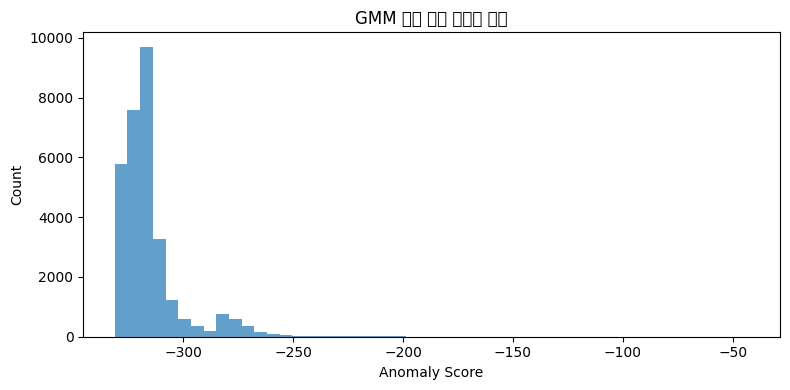

Threshold (95th pct): -280.0395
Detected anomalies: 1548 / 30951


In [18]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt
import torch

# ─────────────────────────────────────────────────────────────────────────────
# 5) GMM 학습 및 이상 스코어 산출
# ─────────────────────────────────────────────────────────────────────────────

# (A) latent 벡터(z)와 재구성 오류(errors) 재계산
latent_list = []
error_list  = []

model.eval()
with torch.no_grad():
    for batch_X, _ in loader:
        # 입력을 DEVICE(cpu 또는 cuda)로 보내기
        batch_X = batch_X.to(DEVICE)
        # Autoencoder 순전파
        recon_batch, z_batch = model(batch_X)
        # MSE 재구성 오류 계산
        batch_err = ((recon_batch - batch_X) ** 2).mean(dim=(1,2)).cpu().numpy()
        error_list.append(batch_err)
        latent_list.append(z_batch.cpu().numpy())

latent = np.vstack(latent_list)               # shape = (N_windows, latent_dim)
errors = np.concatenate(error_list)[:, None]   # shape = (N_windows, 1)

# (B) GMM 입력용 피처 결합
X_gmm = np.hstack([latent, errors])           # shape = (N_windows, latent_dim + 1)

# (C) GaussianMixture 학습
gmm = GaussianMixture(n_components=4,
                      covariance_type='full',
                      random_state=42)
gmm.fit(X_gmm)

# (D) 이상 스코어 계산 (음수 로그 가능도)
log_likelihood = gmm.score_samples(X_gmm)     # 높을수록 정상도 높음
anomaly_score  = -log_likelihood              # 클수록 이상

# (E) 스코어 분포 시각화
plt.figure(figsize=(8,4))
plt.hist(anomaly_score, bins=50, alpha=0.7)
plt.title("GMM 기반 이상 스코어 분포")
plt.xlabel("Anomaly Score")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# (F) 임계치(threshold) 설정 및 이상 개수 확인
threshold   = np.percentile(anomaly_score, 95)    # 상위 5%를 이상치로 간주
is_anomaly  = anomaly_score > threshold
print(f"Threshold (95th pct): {threshold:.4f}")
print("Detected anomalies:", is_anomaly.sum(), "/", len(is_anomaly))


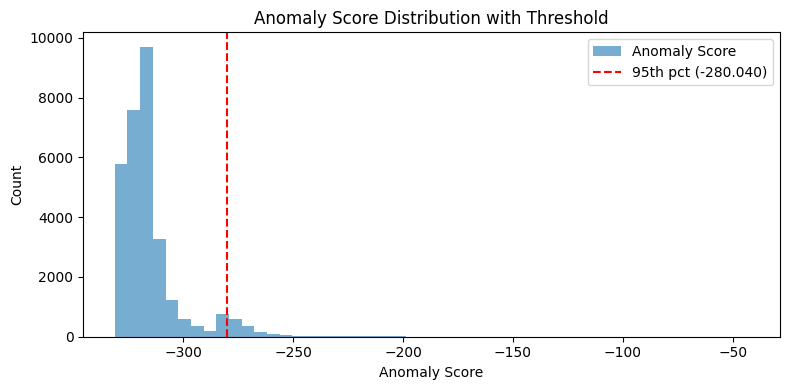

Threshold: -280.0395
Detected 1548 anomalies out of 30951 windows
Anomaly times (first 10):
  2019-09-11 20:15:20
  2019-09-11 20:17:30
  2019-09-11 20:18:10
  2019-09-11 20:19:00
  2019-09-11 20:19:10
  2019-09-11 20:21:10
  2019-09-11 20:24:40
  2019-09-11 20:27:20
  2019-09-11 20:32:50
  2019-09-11 20:34:00
  ...


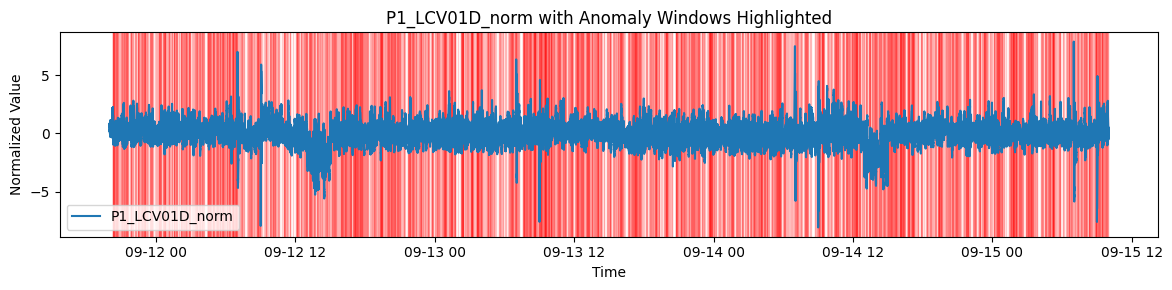

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1) 윈도우별 시작 시각 리스트 생성
times = [df['time'].iloc[i]
         for i in range(0, len(df) - WINDOW_SIZE + 1, STEP_SIZE)]

# 2) 95th 백분위 임계치 계산
threshold = np.percentile(anomaly_score, 95)

# 3) 스코어 분포 히스토그램 + 임계치 선
plt.figure(figsize=(8,4))
plt.hist(anomaly_score, bins=50, alpha=0.6, label='Anomaly Score')
plt.axvline(threshold, color='r', linestyle='--',
            label=f'95th pct ({threshold:.3f})')
plt.xlabel('Anomaly Score')
plt.ylabel('Count')
plt.title('Anomaly Score Distribution with Threshold')
plt.legend()
plt.tight_layout()
plt.show()

# 4) 임계치 초과 윈도우 인덱스 & 시각
is_anomaly     = anomaly_score > threshold
anomaly_idx    = np.where(is_anomaly)[0]
anomaly_times  = [times[i] for i in anomaly_idx]

print(f"Threshold: {threshold:.4f}")
print(f"Detected {len(anomaly_idx)} anomalies out of {len(anomaly_score)} windows")
print("Anomaly times (first 10):")
for t in anomaly_times[:10]:
    print(" ", t)
if len(anomaly_times) > 10:
    print("  ...")

# 5) 센서값 위에 이상 윈도우 강조
fig, ax = plt.subplots(figsize=(12,3))
ax.plot(df['time'], df[norm_cols[0]], label=norm_cols[0])

# 윈도우 하나당 실제 시간 길이 계산
delta = df['time'].iloc[1] - df['time'].iloc[0]  # 한 스텝 간격
win_dur = delta * WINDOW_SIZE

for start_time in anomaly_times:
    ax.axvspan(start_time, start_time + win_dur,
               color='red', alpha=0.2)

ax.set_title(f"{norm_cols[0]} with Anomaly Windows Highlighted")
ax.set_xlabel('Time')
ax.set_ylabel('Normalized Value')
ax.legend()
plt.tight_layout()
plt.show()


Confusion Matrix:
 [[29403  1548]
 [    0     0]] 

Classification Report:
               precision    recall  f1-score   support

      Normal       1.00      0.95      0.97     30951
     Anomaly       0.00      0.00      0.00         0

    accuracy                           0.95     30951
   macro avg       0.50      0.47      0.49     30951
weighted avg       1.00      0.95      0.97     30951



c:\Users\양재우\Desktop\database\archive\.venv310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\양재우\Desktop\database\archive\.venv310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\양재우\Desktop\database\archive\.venv310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

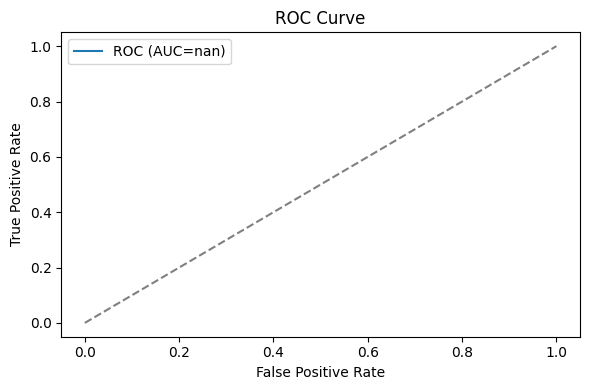

c:\Users\양재우\Desktop\database\archive\.venv310\lib\site-packages\sklearn\metrics\_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


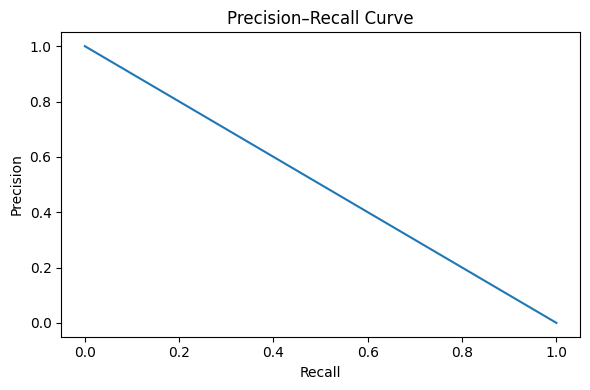

In [21]:
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score, roc_curve,
    precision_recall_curve
)
import matplotlib.pyplot as plt

# 1) 참(真) 라벨과 예측값 준비
#    y:       np.ndarray, shape (N_windows,), 0=정상, 1=이상 (윈도우 라벨)
#    is_anom: np.ndarray bool,     shape (N_windows,) (GMM 판정 결과)
#    anomaly_score: np.ndarray,    shape (N_windows,) (GMM 점수, 클수록 이상)

y_true  = y
y_pred  = is_anomaly.astype(int)
scores  = anomaly_score

# 2) 혼동 행렬 & 분류 보고서
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm, "\n")
print("Classification Report:\n",
      classification_report(y_true, y_pred, target_names=['Normal','Anomaly']))

# 3) ROC-AUC 및 ROC 곡선
auc = roc_auc_score(y_true, scores)
fpr, tpr, _ = roc_curve(y_true, scores)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC (AUC={auc:.3f})')
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.tight_layout()
plt.show()

# 4) Precision–Recall 곡선
prec, rec, _ = precision_recall_curve(y_true, scores)
plt.figure(figsize=(6,4))
plt.plot(rec, prec)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve')
plt.tight_layout()
plt.show()


In [23]:
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset

# 1) 테스트 윈도우를 TensorDataset & DataLoader로
tensor_Xt   = torch.from_numpy(X_test)              # (N_windows, W, F)
test_ds     = TensorDataset(tensor_Xt)
test_loader = DataLoader(test_ds, batch_size=256, shuffle=False)

# 2) 배치 단위로 Autoencoder 추론 → errors, latent 모으기
latent_list = []
error_list  = []

model.eval()
with torch.no_grad():
    for (batch_X,) in test_loader:
        batch_X = batch_X.to(DEVICE)
        recon, z = model(batch_X)
        # MSE 재구성 오류
        errs = ((recon - batch_X)**2).mean(dim=(1,2)).cpu().numpy()
        latent_list.append(z.cpu().numpy())
        error_list.append(errs)

latent_t = np.vstack(latent_list)    # (N_windows, latent_dim)
errors_t = np.hstack(error_list)     # (N_windows,)

# 3) GMM 스코어 & 이진 예측
Xg_test         = np.hstack([latent_t, errors_t.reshape(-1,1)])
loglik_t        = gmm.score_samples(Xg_test)
anomaly_score_t = -loglik_t
y_pred_t        = (anomaly_score_t > threshold).astype(int)

# 4) 평가
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_t))
print(classification_report(y_test, y_pred_t, target_names=['Normal','Attack']))
print("ROC AUC:", roc_auc_score(y_test, anomaly_score_t))


Confusion Matrix:
 [[  286 27441]
 [    0  1424]]
              precision    recall  f1-score   support

      Normal       1.00      0.01      0.02     27727
      Attack       0.05      1.00      0.09      1424

    accuracy                           0.06     29151
   macro avg       0.52      0.51      0.06     29151
weighted avg       0.95      0.06      0.02     29151

ROC AUC: 0.7501751122400062


In [11]:
import torch
print(torch.cuda.is_available())                   # CUDA 사용 가능 여부
print(torch.cuda.get_device_properties(0))         # GPU 사양
print(torch.cuda.memory_allocated())               # 사용 중인 메모리
print(torch.cuda.memory_reserved())                # 예약된(캐시된) 메모리

# python -m pip uninstall torch torchvision torchaudio -y
# python -m pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu118


True
_CudaDeviceProperties(name='NVIDIA GeForce RTX 4070', major=8, minor=9, total_memory=12281MB, multi_processor_count=46, uuid=96881726-50c4-f2a7-cd23-8c78298ad6ae, L2_cache_size=36MB)
160980480
784334848


### 이상치 시각화

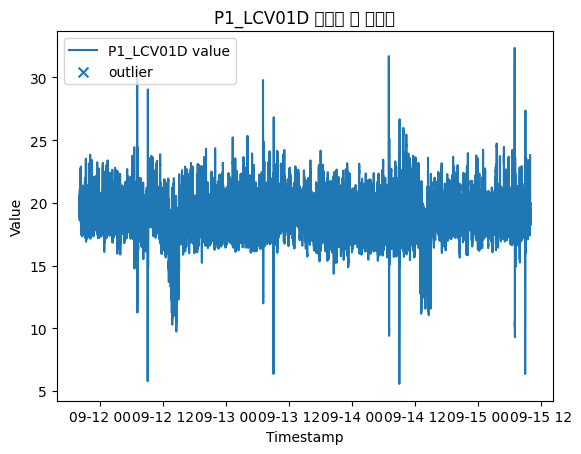

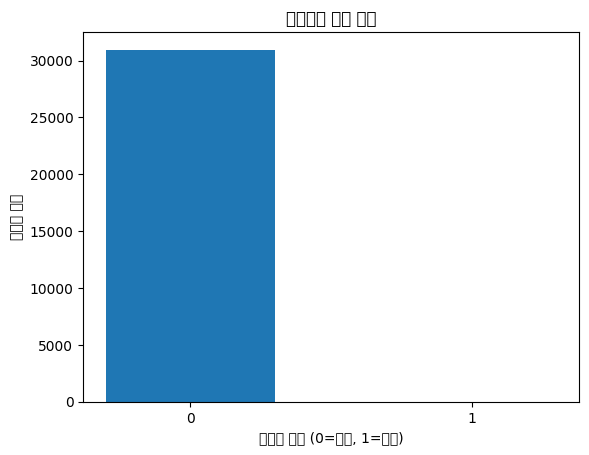

In [ ]:
import matplotlib.pyplot as plt

# 1) 전체 시계열과 이상치 포인트 표시
sensor = 'P1_LCV01D'
time = df['time']
values = df[sensor]
outlier_mask = df[f'{sensor}_outlier']

plt.figure()
plt.plot(time, values, label=f'{sensor} value')
plt.scatter(time[outlier_mask], values[outlier_mask],
            marker='x', s=50, label='outlier')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title(f'{sensor} 시계열 및 이상치')
plt.legend()
plt.show()

# 2) 윈도우별 라벨 분포(히스토그램)
plt.figure()
plt.hist(y, bins=[-0.5, 0.5, 1.5], rwidth=0.6)
plt.xticks([0,1])
plt.xlabel('윈도우 라벨 (0=정상, 1=이상)')
plt.ylabel('윈도우 개수')
plt.title('윈도우별 라벨 분포')
plt.show()


In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # ——————————
# # (1) 윈도우 배열 준비
# # 이미 생성된 `windows` 리스트와 sensor_ranges, WINDOW_SIZE, STEP_SIZE가
# # 동일한 환경에 있다고 가정합니다.

# # 1) 정규화 컬럼만 따로 윈도우로 재생성
# norm_cols = [f'{s}_norm' for s in sensor_ranges]
# windows_norm = [
#     df.iloc[i : i+WINDOW_SIZE][norm_cols].values
#     for i in range(0, len(df)-WINDOW_SIZE+1, STEP_SIZE)
# ]
# windows_norm = np.stack(windows_norm, axis=0)
# # shape = (num_windows, window_size, num_sensors)

# # ——————————
# # (2) 히트맵: 윈도우별 시계열 패턴
# #    - 각 행은 하나의 윈도우, 열은 윈도우 내 타임스텝
# #    - 예시로 sensor1_norm 값만 사용하고 싶다면 windows_norm[:,:,0] 사용

# plt.figure()
# plt.imshow(windows_norm[:, :, 0],    # sensor1_norm 만 보고 싶을 때
#            aspect='auto', origin='lower')
# plt.colorbar(label='sensor1_norm')
# plt.xlabel('Time step within window')
# plt.ylabel('Window index')
# plt.title('Heatmap of Sliding Windows (sensor1_norm)')
# plt.show()

# # ——————————
# # (3) 오버레이 라인 플롯: 모든 윈도우를 겹쳐 그리기
# plt.figure()
# for w in windows_norm:
#     plt.plot(w[:, 0], alpha=0.3)   # sensor1_norm만 예시
# plt.xlabel('Time step within window')
# plt.ylabel('sensor1_norm')
# plt.title('Overlaid Window Segments (sensor1_norm)')
# plt.show()
